# Results and Graphics

---------------------------------------

In [1]:
from astropy.table import Table, Column, table, vstack, join
from pathlib import Path
from matplotlib import pyplot as plt
from scipy.stats import norm

import numpy as np
import pandas as pd
import astropy.units as u

In [2]:
path_raw='../Datos/Raw/'
path_CIGALE_phot = '../Datos/Work/CIGALE_InputPhot/'
path_CIGALE_out = '../Datos/Work/CIGALE_Output/'
path_graphs = '../Datos/Final/Graphics/'
path_FINAL = '../Datos/Final/'

Reading the data with the Ne line ratios and the results from CIGALE:

In [3]:
Ne_Sy = Table.read(path_FINAL+'Ne_ratios_-_CIGALE_results.tbl', format='ascii')
print('Total number of galaxies with Ne ratios data: ',len(Ne_Sy))

Total number of galaxies with Ne ratios data:  95


## Preparing the data:

### Logaritmic values and Error Propagation for the Graphics

In the next cell we calculate the logaritmic values for the Ne ratios, the star formation rate and the mass star with their error propagation

In [4]:
log_NeVNeII_Sy = np.log10(Ne_Sy['[NeV]/[NeII]'])
log_NeVNeIII_Sy = np.log10(Ne_Sy['[NeV]/[NeIII]'])
log_NeIIINeII_Sy = np.log10(Ne_Sy['[NeIII]/[NeII]'])
log_sfr_Sy = np.log10(Ne_Sy['bayes.sfh.sfr'])
log_m_star_Sy = np.log10(Ne_Sy['bayes.stellar.m_star'])

log_NeVNeII_Sy_err = Ne_Sy['[NeV]/[NeII]_err']/(Ne_Sy['[NeV]/[NeII]']*np.log(10))
log_NeVNeIII_Sy_err = Ne_Sy['[NeV]/[NeIII]_err']/(Ne_Sy['[NeV]/[NeIII]']*np.log(10))
log_NeIIINeII_Sy_err = Ne_Sy['[NeIII]/[NeII]_err']/(Ne_Sy['[NeIII]/[NeII]']*np.log(10))
log_sfr_Sy_err = Ne_Sy['bayes.sfh.sfr_err']/(Ne_Sy['bayes.sfh.sfr']*np.log(10))
log_m_star_Sy_err = Ne_Sy['bayes.stellar.m_star_err']/(Ne_Sy['bayes.stellar.m_star']*np.log(10))

#Adding the new values to the table
Ne_Sy['log_[NeV]/[NeII]'] = log_NeVNeII_Sy
Ne_Sy['log_[NeV]/[NeII]_err'] = log_NeVNeII_Sy_err

Ne_Sy['log_[NeV]/[NeIII]'] = log_NeVNeIII_Sy
Ne_Sy['log_[NeV]/[NeIII]_err'] = log_NeVNeIII_Sy_err

Ne_Sy['log_[NeIII]/[NeII]'] = log_NeIIINeII_Sy
Ne_Sy['log_[NeIII]/[NeII]_err'] = log_NeIIINeII_Sy_err

Ne_Sy['log_bayes.sfh.sfr'] = log_sfr_Sy
Ne_Sy['log_bayes.sfh.sfr_err'] = log_sfr_Sy_err

Ne_Sy['log_bayes.stellar.m_star'] = log_m_star_Sy
Ne_Sy['log_bayes.stellar.m_star_err'] = log_m_star_Sy_err

In [5]:
#Ne_Sy['Main_id','otype','bayes.agn.i','[NeV]/[NeII]','bayes.agn.fracAGN','bayes.agn.disk_luminosity']

### Separating the sample according the Ne ratio info

In [6]:
NeVNeII_Sy = Table(Ne_Sy)
NeVNeII_Sy.remove_rows(np.where(np.isnan(NeVNeII_Sy['[NeV]/[NeII]']))[0])
NeVNeIII_Sy = Table(Ne_Sy)
NeVNeIII_Sy.remove_rows(np.where(np.isnan(NeVNeIII_Sy['[NeV]/[NeIII]']))[0])
NeIIINeII_Sy = Table(Ne_Sy)
NeIIINeII_Sy.remove_rows(np.where(np.isnan(NeIIINeII_Sy['[NeIII]/[NeII]']))[0])

print('From the', len(Ne_Sy),'galaxies of the sample:')
print(len(NeVNeII_Sy),'galaxies have [NeV]/[NeII] info,')
print(len(NeVNeIII_Sy),'galaxies have [NeV]/[NeIII] info,')
print(len(NeIIINeII_Sy),'galaxies have [NeIII]/[NeII] info')

From the 95 galaxies of the sample:
82 galaxies have [NeV]/[NeII] info,
80 galaxies have [NeV]/[NeIII] info,
83 galaxies have [NeIII]/[NeII] info


### Separating the groups in Sy1 and Sy2  (according their classification in SIMBAD)

In [7]:
NeVNeII_Sy1 = NeVNeII_Sy[NeVNeII_Sy['otype']=='Sy1']
NeVNeII_Sy2 = NeVNeII_Sy[NeVNeII_Sy['otype']=='Sy2']
NeVNeII_SyG = NeVNeII_Sy[NeVNeII_Sy['otype']=='SyG']

NeVNeIII_Sy1 = NeVNeIII_Sy[NeVNeIII_Sy['otype']=='Sy1']
NeVNeIII_Sy2 = NeVNeIII_Sy[NeVNeIII_Sy['otype']=='Sy2']
NeVNeIII_SyG = NeVNeIII_Sy[NeVNeIII_Sy['otype']=='SyG']

NeIIINeII_Sy1 = NeIIINeII_Sy[NeIIINeII_Sy['otype']=='Sy1']
NeIIINeII_Sy2 = NeIIINeII_Sy[NeIIINeII_Sy['otype']=='Sy2']
NeIIINeII_SyG = NeIIINeII_Sy[NeIIINeII_Sy['otype']=='SyG']

### Converting tables to pandas to compute the correlations coeficients

For computing the pearson's correlation coeficiens, we will use the function corr from Pandas, so we need to convert the tables to pandas

In [8]:
df_NeVNeII_Sy = NeVNeII_Sy.to_pandas()
df_NeVNeII_Sy1 = NeVNeII_Sy1.to_pandas()
df_NeVNeII_Sy2 = NeVNeII_Sy2.to_pandas()
df_NeVNeIII_Sy = NeVNeIII_Sy.to_pandas()
df_NeVNeIII_Sy1 = NeVNeIII_Sy1.to_pandas()
df_NeVNeIII_Sy2 = NeVNeIII_Sy2.to_pandas()
df_NeIIINeII_Sy = NeIIINeII_Sy.to_pandas()
df_NeIIINeII_Sy1 = NeIIINeII_Sy1.to_pandas()
df_NeIIINeII_Sy2 = NeIIINeII_Sy2.to_pandas()

### Bootstraping function for the correlation coefficients

With the next function we compute the correlation coefficient with bootstrapping:

In [9]:
def BootstrapCorr(n,fract,df,var1,var2,histo=False):
    '''
    This functions do the bootstraping for the correlation coefficients
    Inputs:
    n: Number of samples
    fract: Fraction of data from the intial 
           dataframe to make the samples
    df: Dataframe
    var1, var2: Variables to be correlated
    histo: If you want to print the histogram
    '''
    corr_bootstrap = []
    for i in range(n):
        sample = df.sample(frac=fract,replace=True)
        corr = sample[var1].corr(sample[var2])
        corr_bootstrap.append(corr)
    
    # mean and standard deviation
    mu, std = norm.fit(corr_bootstrap)
    
    print('Bootstraps results for the correlation coefficient:')
    print('Samples lenght:',len(sample),'of',len(df))
    print('Number of samples:',n)
    print('Median:',np.median(corr_bootstrap))
    print('Mean:',mu)
    print('Variance:',np.var(corr_bootstrap))
    print('Standard Desviation:',std)
    print('90% confidence interval:',np.percentile(corr_bootstrap,5),'-',np.percentile(corr_bootstrap,95))
    
    if histo == True:
        bins = np.linspace(min(corr_bootstrap), max(corr_bootstrap),50)
        plt.hist(corr_bootstrap, bins=bins, density=True, histtype='step')
        plt.axvline(x=mu,ls='--',color='gray')
        plt.axvline(x=np.percentile(corr_bootstrap,5),ls='--',color='gray')
        plt.axvline(x=np.percentile(corr_bootstrap,95),ls='--',color='gray')
        plt.xlabel(r'Correlation Coefficient')
        plt.ylabel('Probability Density')
        plt.grid(color='k', linestyle='--', linewidth=0.1)
        # Plot the PDF.
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mu, std)
        plt.plot(x, p, 'k', linewidth=0.5)
    
    return corr_bootstrap

----------------------------------------

# [NeV]/[NeII]

In [10]:
print('From the', len(NeVNeII_Sy),'galaxies with [NeV]/[NeII] info:')
print(len(NeVNeII_Sy1),'galaxies are Seyfert 1,')
print(len(NeVNeII_Sy2),'galaxies are Seyfert 2,')
print(len(NeVNeII_SyG),'galaxies are Seyfert without classification')

From the 82 galaxies with [NeV]/[NeII] info:
42 galaxies are Seyfert 1,
40 galaxies are Seyfert 2,
0 galaxies are Seyfert without classification


## Histogram

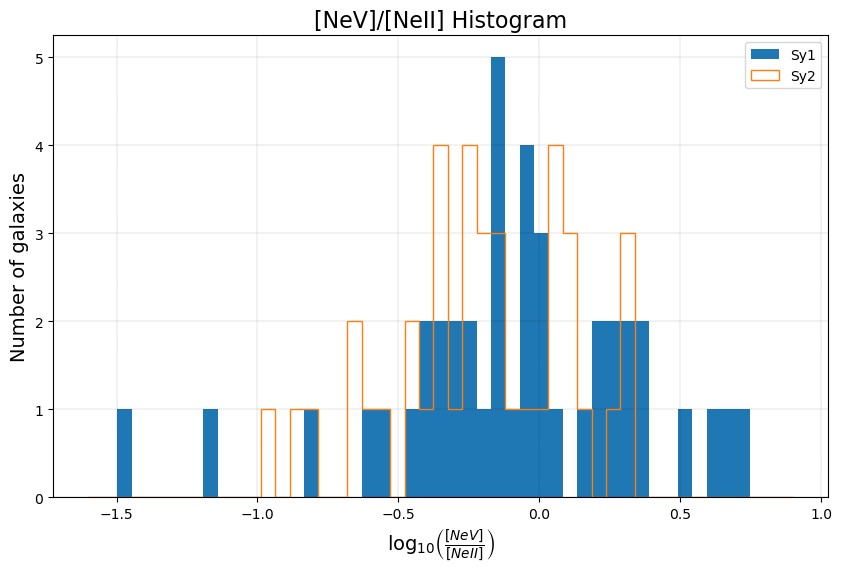

In [11]:
bins_NeVNeII_Sy = np.linspace(-1.6,0.9,50)
plt.figure(figsize=(10,6))
plt.hist(NeVNeII_Sy1['log_[NeV]/[NeII]'], bins=bins_NeVNeII_Sy, label='Sy1')
plt.hist(NeVNeII_Sy2['log_[NeV]/[NeII]'], bins=bins_NeVNeII_Sy, histtype='step', label='Sy2')
#plt.hist(NeVNeII_SyG['log_[NeV]/[NeII]'], bins=bins_NeVNeII_Sy, histtype='step', label='SyG')
plt.xlabel(r'$\log_{10}\left(\frac{[NeV]}{[NeII]}\right)$',fontsize=14)
plt.ylabel('Number of galaxies',fontsize=14)
plt.title('[NeV]/[NeII] Histogram', fontsize=16)
plt.legend()
plt.grid(color='k', linestyle='--', linewidth=0.1)
plt.savefig(path_graphs+'hist_NeV_NeII_Sy.jpg')

## [NeV]/[NeII] vs AGN Fraction

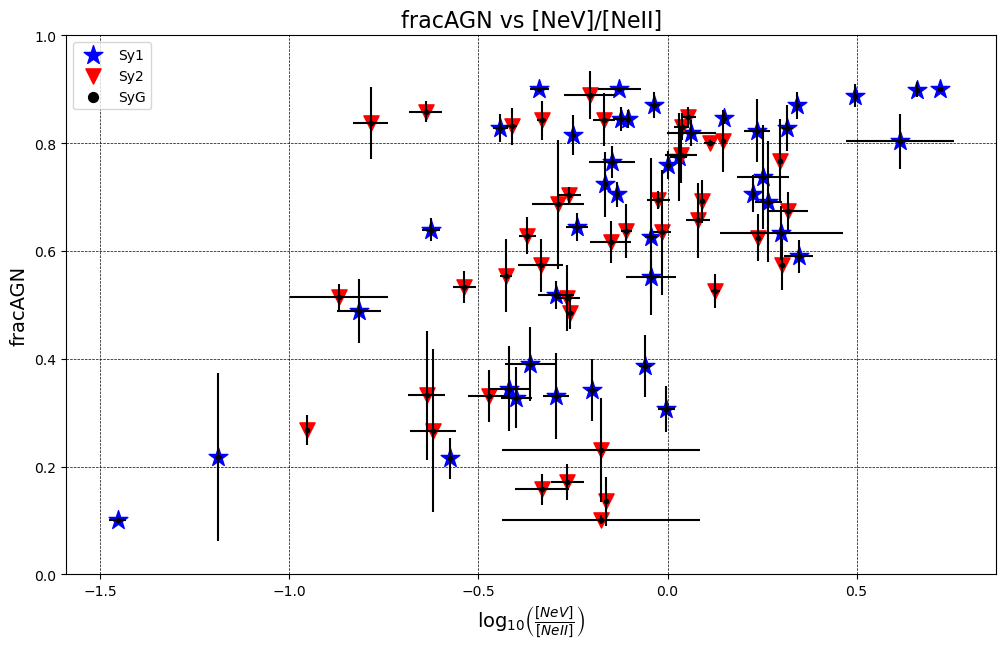

In [12]:
plt.figure(figsize=(12,7))
plt.title(r'fracAGN vs [NeV]/[NeII]', fontsize=16)
plt.scatter(NeVNeII_Sy1['log_[NeV]/[NeII]'],NeVNeII_Sy1['bayes.agn.fracAGN'],200,color='blue',marker = '*',label='Sy1')
plt.errorbar(NeVNeII_Sy1['log_[NeV]/[NeII]'], NeVNeII_Sy1['bayes.agn.fracAGN'],\
             NeVNeII_Sy1['bayes.agn.fracAGN_err'], NeVNeII_Sy1['log_[NeV]/[NeII]_err'], fmt='k.')
plt.scatter(NeVNeII_Sy2['log_[NeV]/[NeII]'], NeVNeII_Sy2['bayes.agn.fracAGN'],120, color='red', marker = 'v', label='Sy2')
plt.errorbar(NeVNeII_Sy2['log_[NeV]/[NeII]'], NeVNeII_Sy2['bayes.agn.fracAGN'],\
             NeVNeII_Sy2['bayes.agn.fracAGN_err'], NeVNeII_Sy2['log_[NeV]/[NeII]_err'], fmt='k.')
plt.scatter(NeVNeII_SyG['log_[NeV]/[NeII]'], NeVNeII_SyG['bayes.agn.fracAGN'],200, color='black', marker = '.', label='SyG')
plt.errorbar(NeVNeII_SyG['log_[NeV]/[NeII]'], NeVNeII_SyG['bayes.agn.fracAGN'],\
             NeVNeII_SyG['bayes.agn.fracAGN_err'], NeVNeII_SyG['log_[NeV]/[NeII]_err'], fmt='k.')
plt.xlabel(r'$\log_{10}\left(\frac{[NeV]}{[NeII]}\right)$', fontsize=14)
plt.ylabel(r'fracAGN', fontsize=14)
plt.ylim(0.0,1.0)
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.legend()
plt.savefig(path_graphs+'NeV_NeII_vs_fracAGN_Sy.jpg')

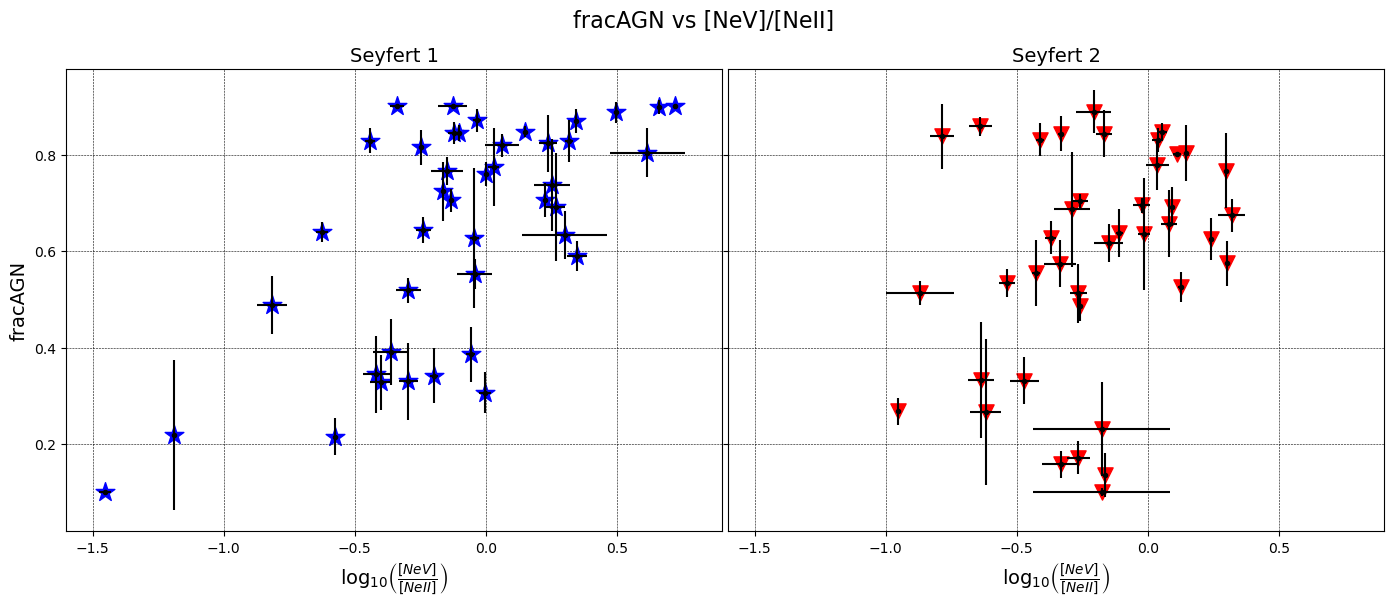

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(17,6),sharey=True)
fig.suptitle(r'fracAGN vs [NeV]/[NeII]', fontsize=16)
ax1.scatter(NeVNeII_Sy1['log_[NeV]/[NeII]'],NeVNeII_Sy1['bayes.agn.fracAGN'],200,color='blue',marker = '*')
ax1.errorbar(NeVNeII_Sy1['log_[NeV]/[NeII]'], NeVNeII_Sy1['bayes.agn.fracAGN'],\
             NeVNeII_Sy1['bayes.agn.fracAGN_err'], NeVNeII_Sy1['log_[NeV]/[NeII]_err'], fmt='k.')
ax1.set_xlim(-1.6,0.9)#ax1.set_xlim(20e-3,10e0) 
ax1.set_xlabel(r'$\log_{10}\left(\frac{[NeV]}{[NeII]}\right)$', fontsize=14)
ax1.set_ylabel(r'fracAGN', fontsize=14)
ax1.set_title('Seyfert 1', fontsize=14)
ax2.scatter(NeVNeII_Sy2['log_[NeV]/[NeII]'], NeVNeII_Sy2['bayes.agn.fracAGN'],120, color='red', marker = 'v')
ax2.errorbar(NeVNeII_Sy2['log_[NeV]/[NeII]'], NeVNeII_Sy2['bayes.agn.fracAGN'],\
             NeVNeII_Sy2['bayes.agn.fracAGN_err'], NeVNeII_Sy2['log_[NeV]/[NeII]_err'], fmt='k.')
ax2.set_xlim(-1.6,0.9)#ax2.set_xlim(20e-3,10e0)
ax2.set_xlabel(r'$\log_{10}\left(\frac{[NeV]}{[NeII]}\right)$', fontsize=14)
ax2.set_title('Seyfert 2', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0.01) #Space between subplots
plt.savefig(path_graphs+'NeV_NeII_vs_fracAGN_Sy1_vs_Sy2.jpg')

## Correlation coefficient between [NeV]/[NeII] and AGN Fraction

In [14]:
NeVNeII_corr_fracAGN_Sy = df_NeVNeII_Sy['log_[NeV]/[NeII]'].corr(df_NeVNeII_Sy['bayes.agn.fracAGN'])
NeVNeII_corr_fracAGN_Sy1 = df_NeVNeII_Sy1['log_[NeV]/[NeII]'].corr(df_NeVNeII_Sy1['bayes.agn.fracAGN'])
NeVNeII_corr_fracAGN_Sy2 = df_NeVNeII_Sy2['log_[NeV]/[NeII]'].corr(df_NeVNeII_Sy2['bayes.agn.fracAGN'])

print('Pearson\'s correlation coefficient between [NeV]/[NeII] ratio and AGN fraction:')
print('Total Sample: ',NeVNeII_corr_fracAGN_Sy)
print('Seyfert 1: ',NeVNeII_corr_fracAGN_Sy1)
print('Seyfert 2: ',NeVNeII_corr_fracAGN_Sy2)

Pearson's correlation coefficient between [NeV]/[NeII] ratio and AGN fraction:
Total Sample:  0.5117530389435667
Seyfert 1:  0.6576009304823218
Seyfert 2:  0.29270448964694584


Bootstraps results for the correlation coefficient:
Samples lenght: 82 of 82
Number of samples: 10000
Median: 0.5124548053436846
Mean: 0.5077492942060092
Variance: 0.007132957786084079
Standard Desviation: 0.08445683978272026
90% confidence interval: 0.3632724058622418 - 0.6384449276056438


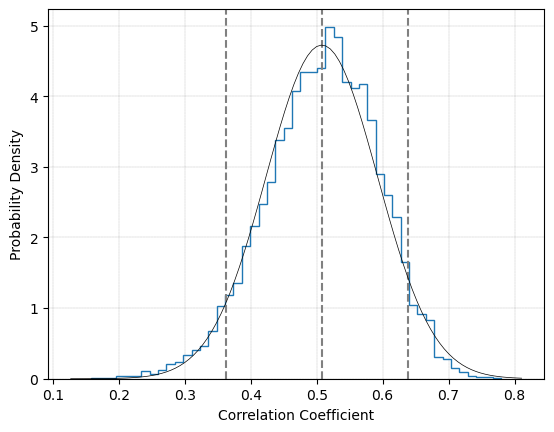

In [15]:
NeVNeII_fracAGN_Sy = BootstrapCorr(10000,1,df_NeVNeII_Sy,'log_[NeV]/[NeII]','bayes.agn.fracAGN',histo=True)

Bootstraps results for the correlation coefficient:
Samples lenght: 42 of 42
Number of samples: 10000
Median: 0.6557813336833327
Mean: 0.6438739286715439
Variance: 0.009774773660252183
Standard Desviation: 0.09886745501049465
90% confidence interval: 0.4662303849974967 - 0.7834407669731832


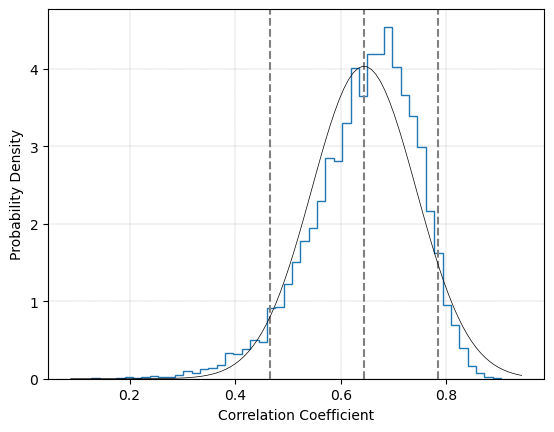

In [16]:
NeVNeII_fracAGN_Sy1 = BootstrapCorr(10000,1,df_NeVNeII_Sy1,'log_[NeV]/[NeII]','bayes.agn.fracAGN',histo=True)

Bootstraps results for the correlation coefficient:
Samples lenght: 40 of 40
Number of samples: 10000
Median: 0.2970689788978833
Mean: 0.2935627270275344
Variance: 0.0173711621568106
Standard Desviation: 0.1317997046916669
90% confidence interval: 0.07186618772874494 - 0.5052241658270882


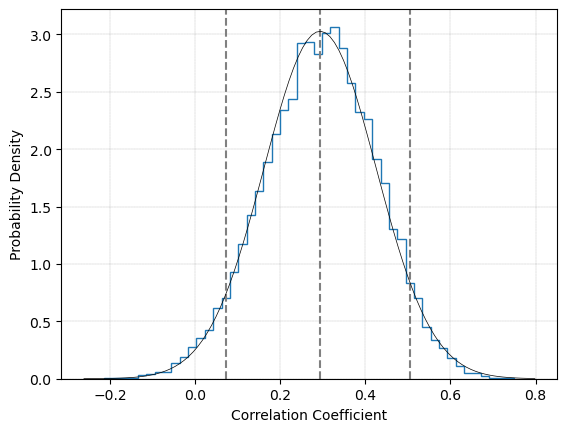

In [17]:
NeVNeII_fracAGN_Sy2 = BootstrapCorr(10000,1,df_NeVNeII_Sy2,'log_[NeV]/[NeII]','bayes.agn.fracAGN',histo=True)

## [NeV]/[NeII] vs other variables (outputs from CIGALE)

### SFR

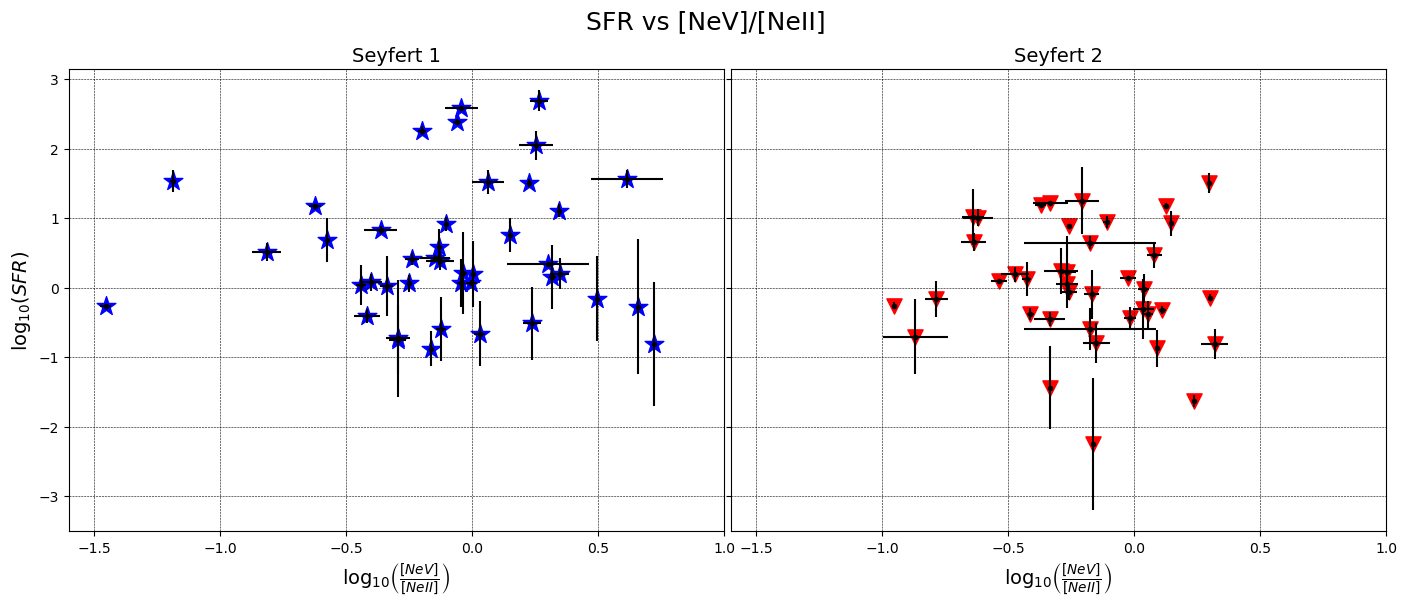

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(17,6),sharey=True)
fig.suptitle(r'SFR vs [NeV]/[NeII]', fontsize=18)
ax1.scatter(NeVNeII_Sy1['log_[NeV]/[NeII]'],NeVNeII_Sy1['log_bayes.sfh.sfr'],200,color='blue',marker = '*')
ax1.errorbar(NeVNeII_Sy1['log_[NeV]/[NeII]'], NeVNeII_Sy1['log_bayes.sfh.sfr'],\
             NeVNeII_Sy1['log_bayes.sfh.sfr_err'], NeVNeII_Sy1['log_[NeV]/[NeII]_err'], fmt='k.')
ax1.set_xlim(-1.6,1)
ax1.set_xlabel(r'$\log_{10}\left(\frac{[NeV]}{[NeII]}\right)$', fontsize=14)
ax1.set_ylabel(r'$\log_{10}(SFR)$', fontsize=14)
ax1.set_title('Seyfert 1', fontsize=14)
ax2.scatter(NeVNeII_Sy2['log_[NeV]/[NeII]'], NeVNeII_Sy2['log_bayes.sfh.sfr'],120, color='red', marker = 'v')
ax2.errorbar(NeVNeII_Sy2['log_[NeV]/[NeII]'], NeVNeII_Sy2['log_bayes.sfh.sfr'],\
             NeVNeII_Sy2['log_bayes.sfh.sfr_err'], NeVNeII_Sy2['log_[NeV]/[NeII]_err'], fmt='k.')
ax2.set_xlim(-1.6,1)
ax2.set_xlabel(r'$\log_{10}\left(\frac{[NeV]}{[NeII]}\right)$', fontsize=14)
ax2.set_title('Seyfert 2', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0.01) #Space between subplots
plt.savefig(path_graphs+'NeV_NeII_vs_sfr_Sy1_vs_Sy2.jpg')

**Correlation:**

In [19]:
NeVNeII_corr_SFR_Sy = df_NeVNeII_Sy['log_[NeV]/[NeII]'].corr(df_NeVNeII_Sy['log_bayes.sfh.sfr'])
NeVNeII_corr_SFR_Sy1 = df_NeVNeII_Sy1['log_[NeV]/[NeII]'].corr(df_NeVNeII_Sy1['log_bayes.sfh.sfr'])
NeVNeII_corr_SFR_Sy2 = df_NeVNeII_Sy2['log_[NeV]/[NeII]'].corr(df_NeVNeII_Sy2['log_bayes.sfh.sfr'])

print('\nPearson\'s correlation coefficient between [NeV]/[NeII] ratio and Star Forming Rate:')
print('Total Sample: ',NeVNeII_corr_SFR_Sy)
print('Seyfert 1: ',NeVNeII_corr_SFR_Sy1)
print('Seyfert 2: ',NeVNeII_corr_SFR_Sy2)


Pearson's correlation coefficient between [NeV]/[NeII] ratio and Star Forming Rate:
Total Sample:  0.032358634951446724
Seyfert 1:  0.039911514993654175
Seyfert 2:  -0.08220104651402141


Bootstraps results for the correlation coefficient:
Samples lenght: 82 of 82
Number of samples: 10000
Median: 0.0355000508039084
Mean: 0.03328089385001691
Variance: 0.011377228805538507
Standard Desviation: 0.10666409332825413
90% confidence interval: -0.14424536055376666 - 0.20716899051083437


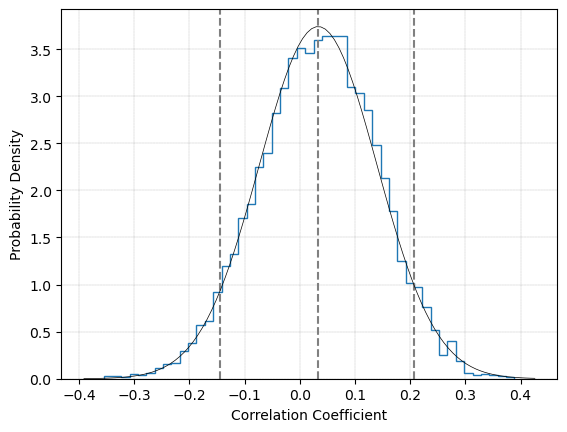

In [20]:
NeVNeII_SFR_Sy = BootstrapCorr(10000,1,df_NeVNeII_Sy,'log_[NeV]/[NeII]','log_bayes.sfh.sfr',histo=True)

Bootstraps results for the correlation coefficient:
Samples lenght: 42 of 42
Number of samples: 10000
Median: 0.043852793366340084
Mean: 0.040736645989534914
Variance: 0.02130994485239675
Standard Desviation: 0.1459792617202757
90% confidence interval: -0.20433783523157625 - 0.27604682286632093


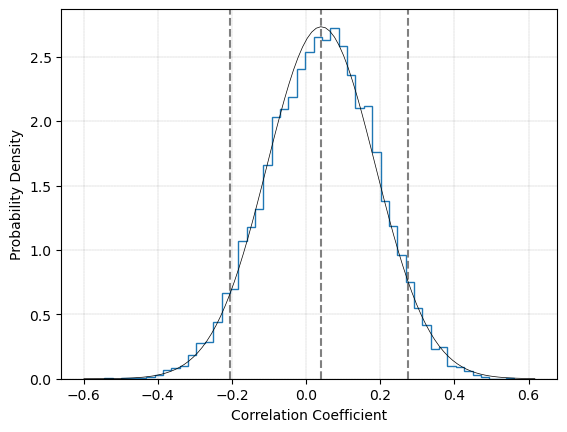

In [21]:
NeVNeII_SFR_Sy1 = BootstrapCorr(10000,1,df_NeVNeII_Sy1,'log_[NeV]/[NeII]','log_bayes.sfh.sfr',histo=True)

Bootstraps results for the correlation coefficient:
Samples lenght: 40 of 40
Number of samples: 10000
Median: -0.08306954423238136
Mean: -0.08328884784697041
Variance: 0.024264747359536487
Standard Desviation: 0.15577145874497192
90% confidence interval: -0.3426880457002195 - 0.17301165538166388


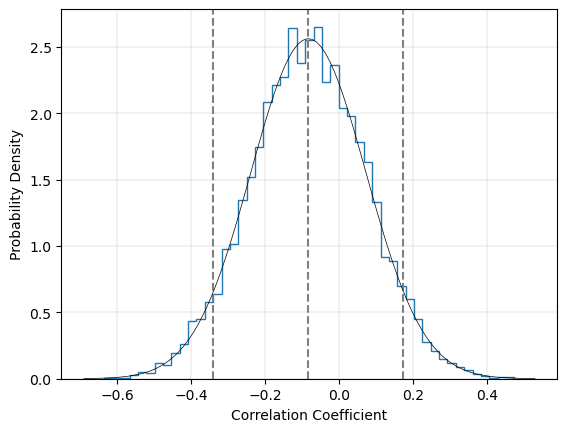

In [22]:
NeVNeII_SFR_Sy2 = BootstrapCorr(10000,1,df_NeVNeII_Sy2,'log_[NeV]/[NeII]','log_bayes.sfh.sfr',histo=True)

### Star Mass

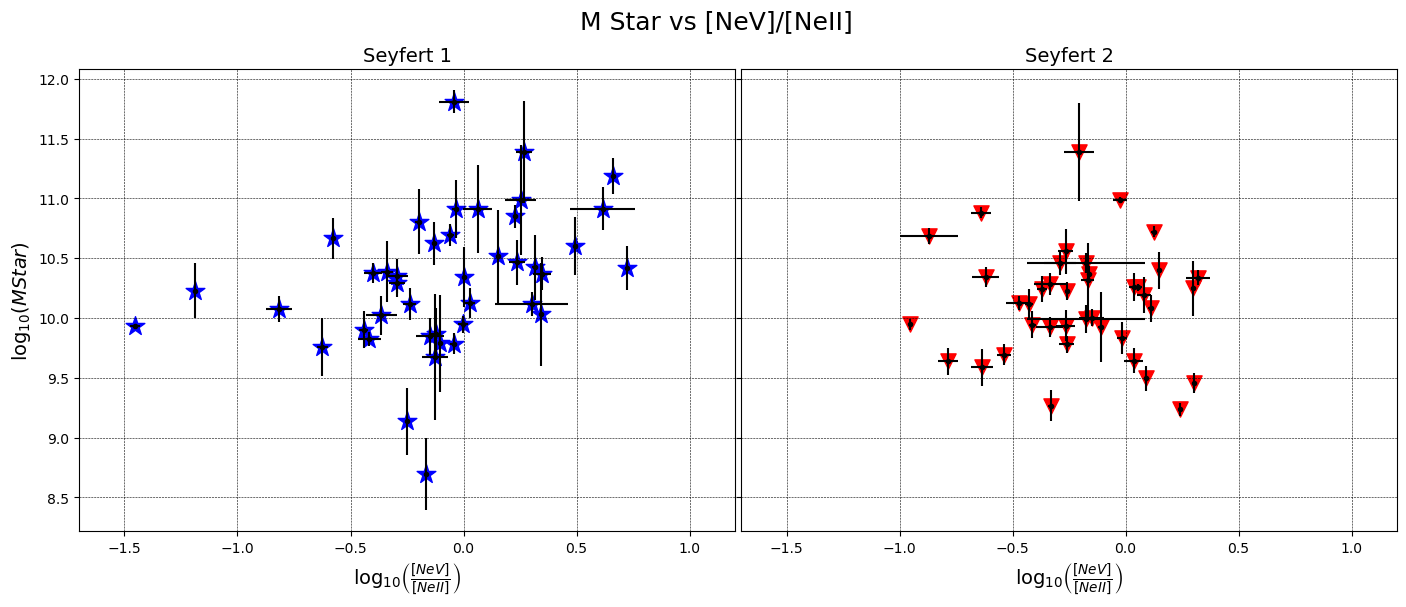

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(17,6),sharey=True)
fig.suptitle(r'M Star vs [NeV]/[NeII]', fontsize=18)
ax1.scatter(NeVNeII_Sy1['log_[NeV]/[NeII]'],NeVNeII_Sy1['log_bayes.stellar.m_star'],200,color='blue',marker = '*')
ax1.errorbar(NeVNeII_Sy1['log_[NeV]/[NeII]'], NeVNeII_Sy1['log_bayes.stellar.m_star'],\
             NeVNeII_Sy1['log_bayes.stellar.m_star_err'], NeVNeII_Sy1['log_[NeV]/[NeII]_err'], fmt='k.')
ax1.set_xlim(-1.7,1.2)
ax1.set_xlabel(r'$\log_{10}\left(\frac{[NeV]}{[NeII]}\right)$', fontsize=14)
ax1.set_ylabel(r'$\log_{10}(MStar)$', fontsize=14)
ax1.set_title('Seyfert 1', fontsize=14)
ax2.scatter(NeVNeII_Sy2['log_[NeV]/[NeII]'], NeVNeII_Sy2['log_bayes.stellar.m_star'],120, color='red', marker = 'v')
ax2.errorbar(NeVNeII_Sy2['log_[NeV]/[NeII]'], NeVNeII_Sy2['log_bayes.stellar.m_star'],\
             NeVNeII_Sy2['log_bayes.stellar.m_star_err'], NeVNeII_Sy2['log_[NeV]/[NeII]_err'], fmt='k.')
ax2.set_xlim(-1.7,1.2)
ax2.set_xlabel(r'$\log_{10}\left(\frac{[NeV]}{[NeII]}\right)$', fontsize=14)
ax2.set_title('Seyfert 2', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0.01) #Space between subplots

**Correlation:**

In [24]:
NeVNeII_corr_m_star_Sy = df_NeVNeII_Sy['log_[NeV]/[NeII]'].corr(df_NeVNeII_Sy['log_bayes.stellar.m_star'])
NeVNeII_corr_m_star_Sy1 = df_NeVNeII_Sy1['log_[NeV]/[NeII]'].corr(df_NeVNeII_Sy1['log_bayes.stellar.m_star'])
NeVNeII_corr_m_star_Sy2 = df_NeVNeII_Sy2['log_[NeV]/[NeII]'].corr(df_NeVNeII_Sy2['log_bayes.stellar.m_star'])

print('\nPearson\'s correlation coefficient between [NeV]/[NeII] ratio and Star Mass:')
print('Total Sample: ',NeVNeII_corr_m_star_Sy)
print('Seyfert 1: ',NeVNeII_corr_m_star_Sy1)
print('Seyfert 2: ',NeVNeII_corr_m_star_Sy2)


Pearson's correlation coefficient between [NeV]/[NeII] ratio and Star Mass:
Total Sample:  0.23862348785855922
Seyfert 1:  0.36543437601265155
Seyfert 2:  -0.051934160313952725


Bootstraps results for the correlation coefficient:
Samples lenght: 82 of 82
Number of samples: 10000
Median: 0.24076074925427127
Mean: 0.23907804361605273
Variance: 0.007878313692445803
Standard Desviation: 0.08875986532462633
90% confidence interval: 0.09070188822551777 - 0.3836808239398076


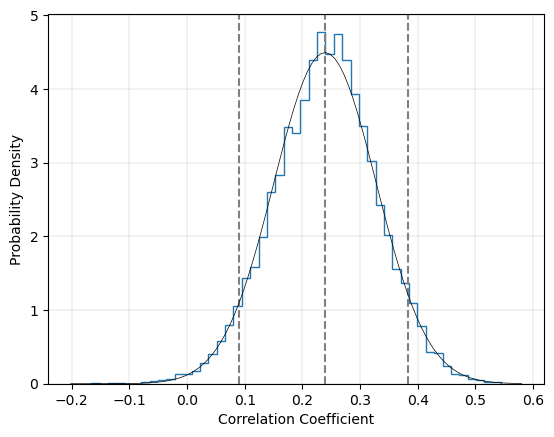

In [25]:
NeVNeII_m_star_Sy = BootstrapCorr(10000,1,df_NeVNeII_Sy,'log_[NeV]/[NeII]','log_bayes.stellar.m_star',histo=True)

Bootstraps results for the correlation coefficient:
Samples lenght: 42 of 42
Number of samples: 10000
Median: 0.3710413069362426
Mean: 0.37230943491668744
Variance: 0.007043580301981777
Standard Desviation: 0.08392604066665946
90% confidence interval: 0.23666789787830098 - 0.5109058187675924


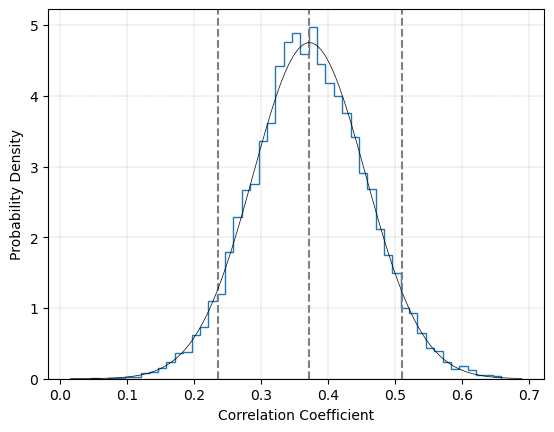

In [26]:
NeVNeII_m_star_Sy1 = BootstrapCorr(10000,1,df_NeVNeII_Sy1,'log_[NeV]/[NeII]','log_bayes.stellar.m_star',histo=True)

Bootstraps results for the correlation coefficient:
Samples lenght: 40 of 40
Number of samples: 10000
Median: -0.04792569810787182
Mean: -0.04599558051739313
Variance: 0.027759525537065174
Standard Desviation: 0.1666119009466766
90% confidence interval: -0.31674385709709485 - 0.23091399127008774


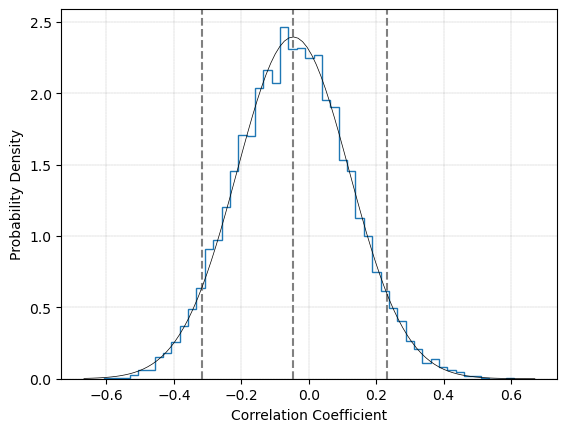

In [27]:
NeVNeII_m_star_Sy2 = BootstrapCorr(10000,1,df_NeVNeII_Sy2,'log_[NeV]/[NeII]','log_bayes.stellar.m_star',histo=True)

## Correlations Matrix

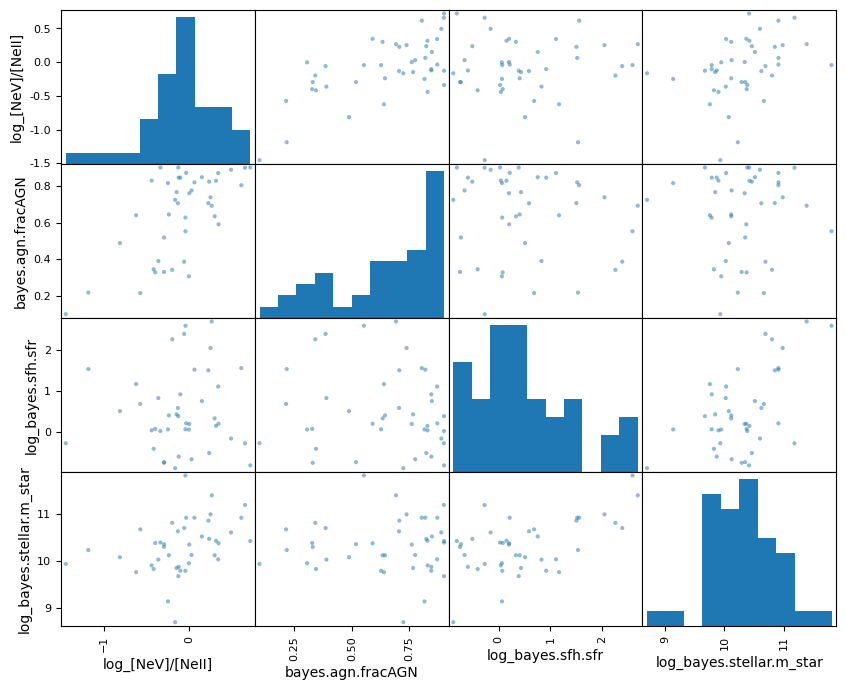

In [28]:
attributes=['log_[NeV]/[NeII]','bayes.agn.fracAGN','log_bayes.sfh.sfr','log_bayes.stellar.m_star']
scatMatrix_Sy1=pd.plotting.scatter_matrix(df_NeVNeII_Sy1[attributes], figsize=(10,8))

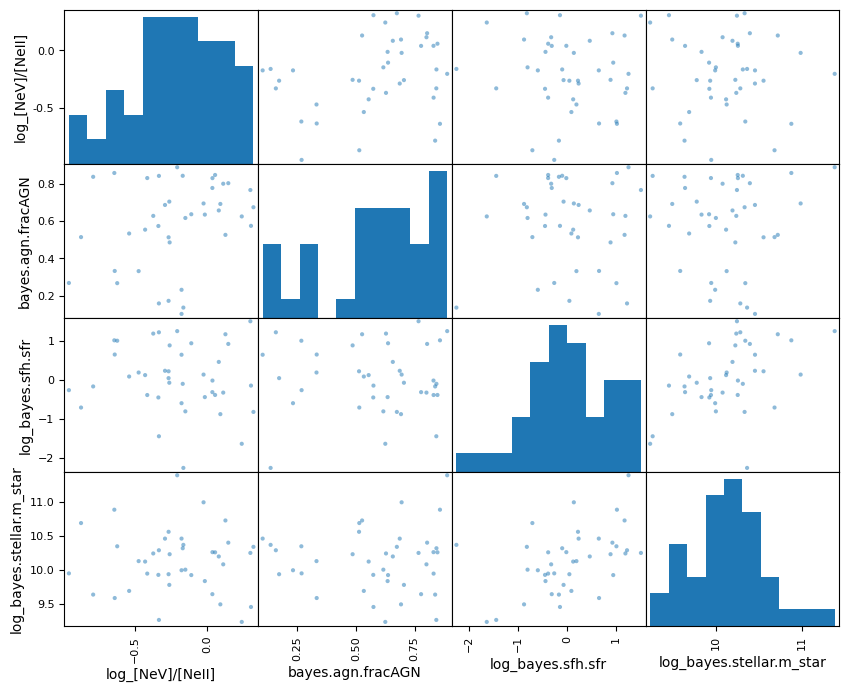

In [29]:
scatMatrix_Sy2=pd.plotting.scatter_matrix(df_NeVNeII_Sy2[attributes], figsize=(10,8))

--------------------------------------

# [NeV]/[NeIII]

In [30]:
print('From the', len(NeVNeIII_Sy),'galaxies with [NeV]/[NeIII] info:')
print(len(NeVNeIII_Sy1),'galaxies are Seyfert 1,')
print(len(NeVNeIII_Sy2),'galaxies are Seyfert 2,')
print(len(NeVNeIII_SyG),'galaxies are Seyfert without classification\n')

From the 80 galaxies with [NeV]/[NeIII] info:
36 galaxies are Seyfert 1,
44 galaxies are Seyfert 2,
0 galaxies are Seyfert without classification



## Histogram

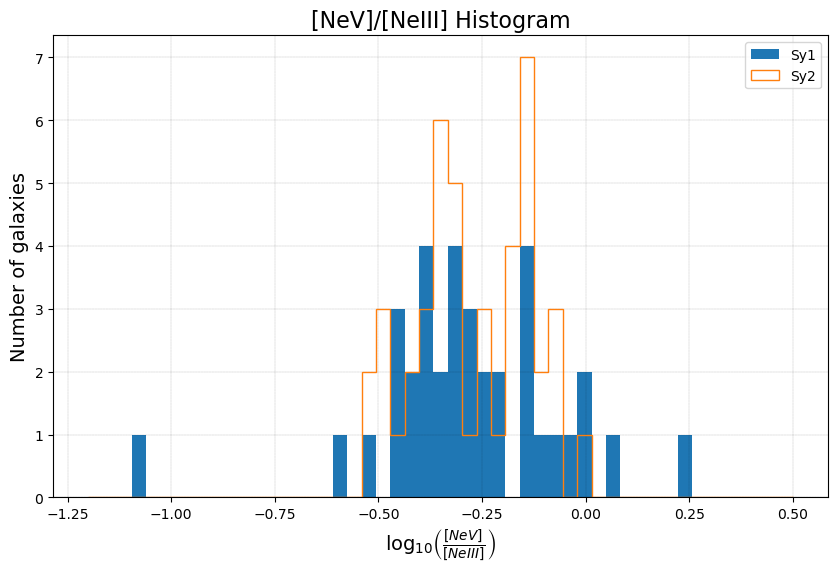

In [31]:
bins_NeVNeIII_Sy = np.linspace(-1.2,0.5,50)
plt.figure(figsize=(10,6))
plt.hist(NeVNeIII_Sy1['log_[NeV]/[NeIII]'], bins=bins_NeVNeIII_Sy, label='Sy1')
plt.hist(NeVNeIII_Sy2['log_[NeV]/[NeIII]'], bins=bins_NeVNeIII_Sy, histtype='step', label='Sy2')
#plt.hist(NeVNeIII_SyG['log_[NeV]/[NeIII]'], bins=bins_NeVNeIII_Sy, histtype='step', label='SyG')
plt.xlabel(r'$\log_{10}\left(\frac{[NeV]}{[NeIII]}\right)$',fontsize=14)
plt.ylabel('Number of galaxies',fontsize=14)
plt.title('[NeV]/[NeIII] Histogram', fontsize=16)
plt.grid(color='k', linestyle='--', linewidth=0.1)
plt.legend()
plt.savefig(path_graphs+'hist_NeV_NeIII_Sy.jpg')

## [NeV]/[NeIII] vs AGN Fraction

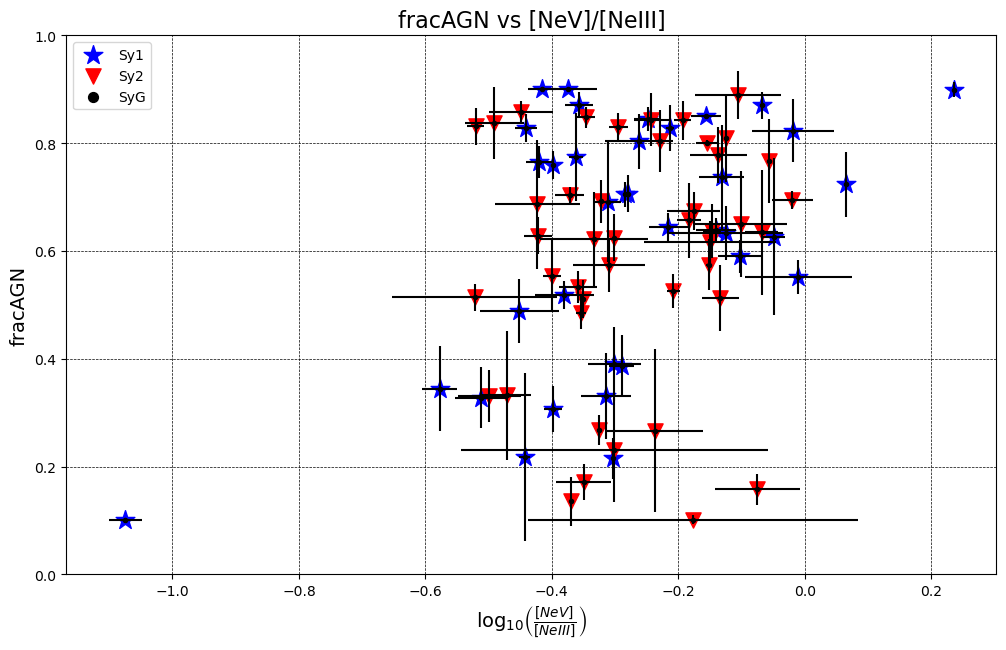

In [32]:
plt.figure(figsize=(12,7))
plt.title(r'fracAGN vs [NeV]/[NeIII]', fontsize=16)
plt.scatter(NeVNeIII_Sy1['log_[NeV]/[NeIII]'],NeVNeIII_Sy1['bayes.agn.fracAGN'],200,color='blue',marker = '*',label='Sy1')
plt.errorbar(NeVNeIII_Sy1['log_[NeV]/[NeIII]'], NeVNeIII_Sy1['bayes.agn.fracAGN'],\
             NeVNeIII_Sy1['bayes.agn.fracAGN_err'], NeVNeIII_Sy1['log_[NeV]/[NeIII]_err'], fmt='k.')
plt.scatter(NeVNeIII_Sy2['log_[NeV]/[NeIII]'], NeVNeIII_Sy2['bayes.agn.fracAGN'],120, color='red', marker = 'v', label='Sy2')
plt.errorbar(NeVNeIII_Sy2['log_[NeV]/[NeIII]'], NeVNeIII_Sy2['bayes.agn.fracAGN'],\
             NeVNeIII_Sy2['bayes.agn.fracAGN_err'], NeVNeIII_Sy2['log_[NeV]/[NeIII]_err'], fmt='k.')
plt.scatter(NeVNeIII_SyG['log_[NeV]/[NeIII]'], NeVNeIII_SyG['bayes.agn.fracAGN'],200, color='black', marker = '.', label='SyG')
plt.errorbar(NeVNeIII_SyG['log_[NeV]/[NeIII]'], NeVNeIII_SyG['bayes.agn.fracAGN'],\
             NeVNeIII_SyG['bayes.agn.fracAGN_err'], NeVNeIII_SyG['log_[NeV]/[NeIII]_err'], fmt='k.')
plt.xlabel(r'$\log_{10}\left(\frac{[NeV]}{[NeIII]}\right)$', fontsize=14)
plt.ylabel(r'fracAGN', fontsize=14)
plt.ylim(0.0,1.0)
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.legend()
plt.savefig(path_graphs+'NeV_NeIII_vs_fracAGN_Sy.jpg')

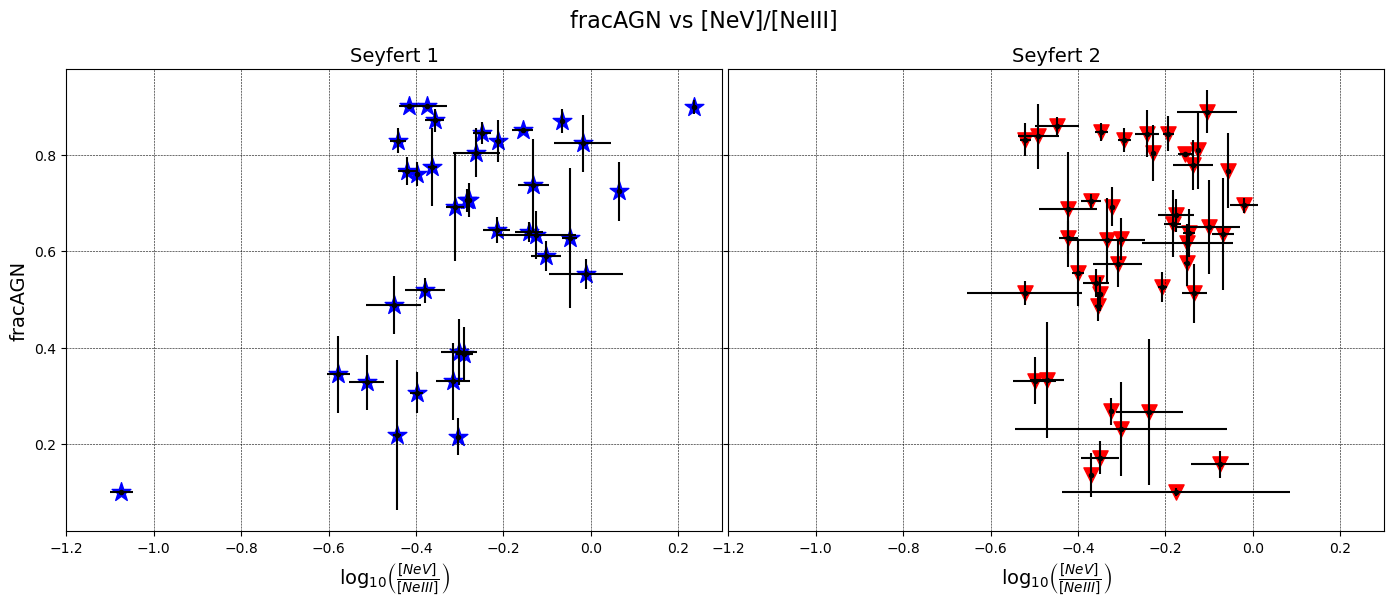

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(17,6),sharey=True)
fig.suptitle(r'fracAGN vs [NeV]/[NeIII]', fontsize=16)
ax1.scatter(NeVNeIII_Sy1['log_[NeV]/[NeIII]'],NeVNeIII_Sy1['bayes.agn.fracAGN'],200,color='blue',marker = '*')
ax1.errorbar(NeVNeIII_Sy1['log_[NeV]/[NeIII]'], NeVNeIII_Sy1['bayes.agn.fracAGN'],\
             NeVNeIII_Sy1['bayes.agn.fracAGN_err'], NeVNeIII_Sy1['log_[NeV]/[NeIII]_err'], fmt='k.')
ax1.set_xlim(-1.2,0.3)#ax1.set_xlim(20e-3,10e0) 
ax1.set_xlabel(r'$\log_{10}\left(\frac{[NeV]}{[NeIII]}\right)$', fontsize=14)
ax1.set_ylabel(r'fracAGN', fontsize=14)
ax1.set_title('Seyfert 1', fontsize=14)
ax2.scatter(NeVNeIII_Sy2['log_[NeV]/[NeIII]'], NeVNeIII_Sy2['bayes.agn.fracAGN'],120, color='red', marker = 'v')
ax2.errorbar(NeVNeIII_Sy2['log_[NeV]/[NeIII]'], NeVNeIII_Sy2['bayes.agn.fracAGN'],\
             NeVNeIII_Sy2['bayes.agn.fracAGN_err'], NeVNeIII_Sy2['log_[NeV]/[NeIII]_err'], fmt='k.')
ax2.set_xlim(-1.2,0.3)#ax2.set_xlim(20e-3,10e0)
ax2.set_xlabel(r'$\log_{10}\left(\frac{[NeV]}{[NeIII]}\right)$', fontsize=14)
ax2.set_title('Seyfert 2', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0.01) #Space between subplots
plt.savefig(path_graphs+'NeV_NeIII_vs_fracAGN_Sy1_vs_Sy2.jpg')

## Correlation coefficient between [NeV]/[NeIII] and AGN Fraction

In [34]:
NeVNeIII_corr_fracAGN_Sy = df_NeVNeIII_Sy['log_[NeV]/[NeIII]'].corr(df_NeVNeIII_Sy['bayes.agn.fracAGN'])
NeVNeIII_corr_fracAGN_Sy1 = df_NeVNeIII_Sy1['log_[NeV]/[NeIII]'].corr(df_NeVNeIII_Sy1['bayes.agn.fracAGN'])
NeVNeIII_corr_fracAGN_Sy2 = df_NeVNeIII_Sy2['log_[NeV]/[NeIII]'].corr(df_NeVNeIII_Sy2['bayes.agn.fracAGN'])

print('Pearson\'s correlation coefficient between [NeV]/[NeIII] ratio and AGN fraction:')
print('Total Sample: ',NeVNeIII_corr_fracAGN_Sy)
print('Seyfert 1: ',NeVNeIII_corr_fracAGN_Sy1)
print('Seyfert 2: ',NeVNeIII_corr_fracAGN_Sy2)

Pearson's correlation coefficient between [NeV]/[NeIII] ratio and AGN fraction:
Total Sample:  0.327751465534536
Seyfert 1:  0.5098878980360981
Seyfert 2:  0.1121293293937291


In [35]:
NeVNeIII_fracAGN_Sy = BootstrapCorr(10000,1,df_NeVNeIII_Sy,'log_[NeV]/[NeIII]','bayes.agn.fracAGN')

Bootstraps results for the correlation coefficient:
Samples lenght: 80 of 80
Number of samples: 10000
Median: 0.326501868013475
Mean: 0.3200443982065445
Variance: 0.013129353559468709
Standard Desviation: 0.1145833912897882
90% confidence interval: 0.11956739999960993 - 0.4973664420004222


In [36]:
NeVNeIII_fracAGN_Sy1 = BootstrapCorr(10000,1,df_NeVNeIII_Sy1,'log_[NeV]/[NeIII]','bayes.agn.fracAGN')

Bootstraps results for the correlation coefficient:
Samples lenght: 36 of 36
Number of samples: 10000
Median: 0.5058658880812728
Mean: 0.4853758145188065
Variance: 0.021778407290612672
Standard Desviation: 0.14757509034594107
90% confidence interval: 0.20782404064303903 - 0.6912981209594037


In [37]:
NeVNeIII_fracAGN_Sy2 = BootstrapCorr(10000,1,df_NeVNeIII_Sy2,'log_[NeV]/[NeIII]','bayes.agn.fracAGN')

Bootstraps results for the correlation coefficient:
Samples lenght: 44 of 44
Number of samples: 10000
Median: 0.11841116095976575
Mean: 0.11746686574089897
Variance: 0.021778557821191924
Standard Desviation: 0.1475756003585685
90% confidence interval: -0.12369708604629183 - 0.359449410965874


## [NeV]/[NeIII] vs other variables (outputs from CIGALE)

In [38]:
NeVNeIII_corr_SFR_Sy = df_NeVNeIII_Sy['log_[NeV]/[NeIII]'].corr(df_NeVNeIII_Sy['log_bayes.sfh.sfr'])
NeVNeIII_corr_SFR_Sy1 = df_NeVNeIII_Sy1['log_[NeV]/[NeIII]'].corr(df_NeVNeIII_Sy1['log_bayes.sfh.sfr'])
NeVNeIII_corr_SFR_Sy2 = df_NeVNeIII_Sy2['log_[NeV]/[NeIII]'].corr(df_NeVNeIII_Sy2['log_bayes.sfh.sfr'])

NeVNeIII_corr_m_star_Sy = df_NeVNeIII_Sy['log_[NeV]/[NeIII]'].corr(df_NeVNeIII_Sy['log_bayes.stellar.m_star'])
NeVNeIII_corr_m_star_Sy1 = df_NeVNeIII_Sy1['log_[NeV]/[NeIII]'].corr(df_NeVNeIII_Sy1['log_bayes.stellar.m_star'])
NeVNeIII_corr_m_star_Sy2 = df_NeVNeIII_Sy2['log_[NeV]/[NeIII]'].corr(df_NeVNeIII_Sy2['log_bayes.stellar.m_star'])

print('\nPearson\'s correlation coefficient between [NeV]/[NeIII] ratio and Star Forming Rate:')
print('Total Sample: ',NeVNeIII_corr_SFR_Sy)
print('Seyfert 1: ',NeVNeIII_corr_SFR_Sy1)
print('Seyfert 2: ',NeVNeIII_corr_SFR_Sy2)

print('\nPearson\'s correlation coefficient between [NeV]/[NeIII] ratio and Star Mass:')
print('Total Sample: ',NeVNeIII_corr_m_star_Sy)
print('Seyfert 1: ',NeVNeIII_corr_m_star_Sy1)
print('Seyfert 2: ',NeVNeIII_corr_m_star_Sy2)


Pearson's correlation coefficient between [NeV]/[NeIII] ratio and Star Forming Rate:
Total Sample:  0.13692390810612748
Seyfert 1:  0.11909150884527019
Seyfert 2:  0.19114565421232524

Pearson's correlation coefficient between [NeV]/[NeIII] ratio and Star Mass:
Total Sample:  0.16452100472139064
Seyfert 1:  0.17502263968013682
Seyfert 2:  0.16678596785220792


----------------------------------

# [NeIII]/[NeII]

In [39]:
print('From the', len(NeIIINeII_Sy),'galaxies with [NeIII]/[NeII] info:')
print(len(NeIIINeII_Sy1),'galaxies are Seyfert 1,')
print(len(NeIIINeII_Sy2),'galaxies are Seyfert 2,')
print(len(NeIIINeII_SyG),'galaxies are Seyfert without classification\n')

From the 83 galaxies with [NeIII]/[NeII] info:
40 galaxies are Seyfert 1,
43 galaxies are Seyfert 2,
0 galaxies are Seyfert without classification



## Histogram

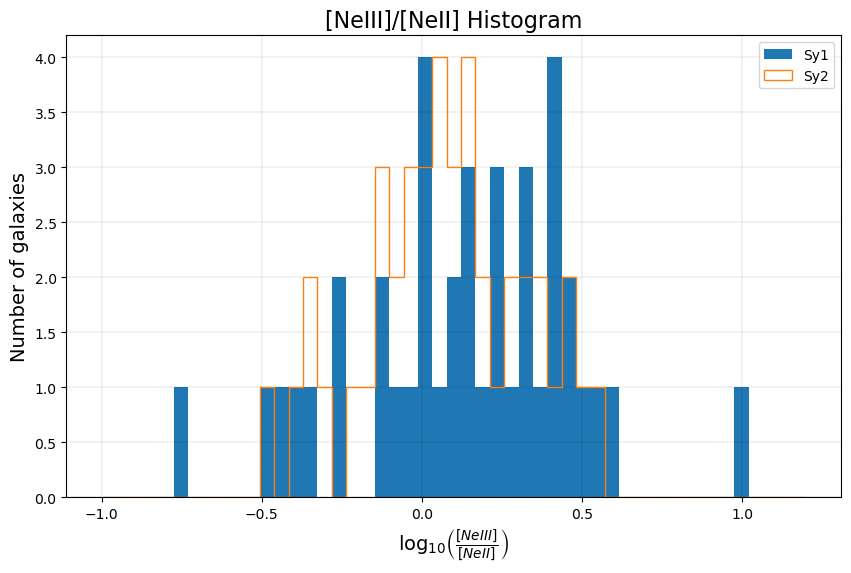

In [40]:
bins_NeIIINeII_Sy = np.linspace(-1.0,1.2,50)
plt.figure(figsize=(10,6))
plt.hist(NeIIINeII_Sy1['log_[NeIII]/[NeII]'], bins=bins_NeIIINeII_Sy, label='Sy1')
plt.hist(NeIIINeII_Sy2['log_[NeIII]/[NeII]'], bins=bins_NeIIINeII_Sy, histtype='step', label='Sy2')
#plt.hist(NeIIINeII_SyG['log_[NeIII]/[NeII]'], bins=bins_NeIIINeII_Sy, histtype='step', label='SyG')
plt.xlabel(r'$\log_{10}\left(\frac{[NeIII]}{[NeII]}\right)$',fontsize=14)
plt.ylabel('Number of galaxies',fontsize=14)
plt.title('[NeIII]/[NeII] Histogram', fontsize=16)
plt.grid(color='k', linestyle='--', linewidth=0.1)
plt.legend()
plt.savefig(path_graphs+'hist_NeIII_NeII_Sy.jpg')

## [NeIII]/[NeII] vs AGN Fraction

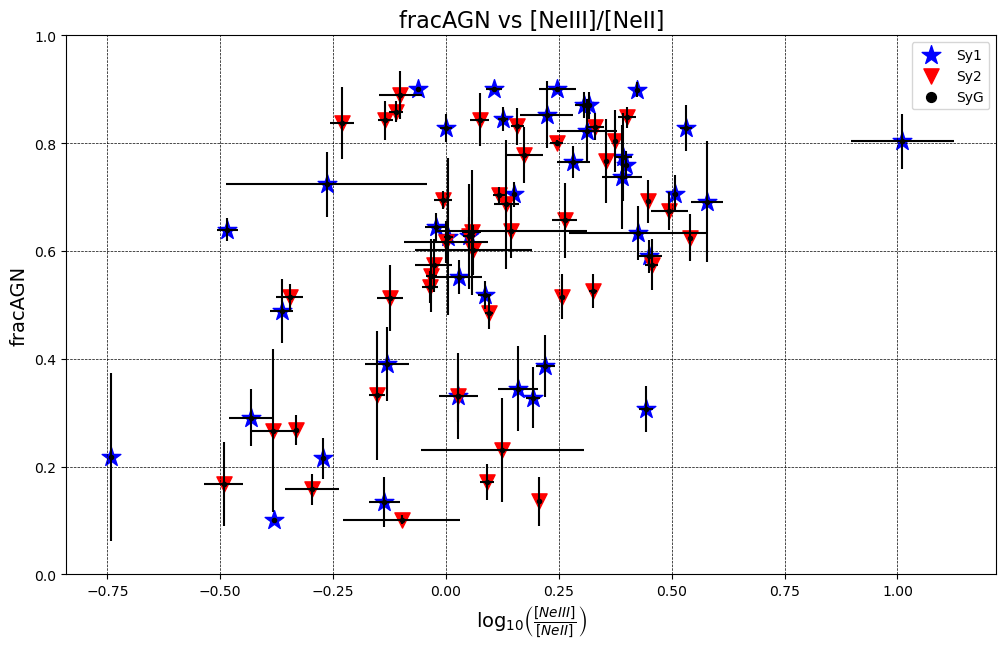

In [41]:
plt.figure(figsize=(12,7))
plt.title(r'fracAGN vs [NeIII]/[NeII]', fontsize=16)
plt.scatter(NeIIINeII_Sy1['log_[NeIII]/[NeII]'],NeIIINeII_Sy1['bayes.agn.fracAGN'],200,color='blue',marker = '*',label='Sy1')
plt.errorbar(NeIIINeII_Sy1['log_[NeIII]/[NeII]'], NeIIINeII_Sy1['bayes.agn.fracAGN'],\
             NeIIINeII_Sy1['bayes.agn.fracAGN_err'], NeIIINeII_Sy1['log_[NeIII]/[NeII]_err'], fmt='k.')
plt.scatter(NeIIINeII_Sy2['log_[NeIII]/[NeII]'], NeIIINeII_Sy2['bayes.agn.fracAGN'],120, color='red', marker = 'v', label='Sy2')
plt.errorbar(NeIIINeII_Sy2['log_[NeIII]/[NeII]'], NeIIINeII_Sy2['bayes.agn.fracAGN'],\
             NeIIINeII_Sy2['bayes.agn.fracAGN_err'], NeIIINeII_Sy2['log_[NeIII]/[NeII]_err'], fmt='k.')
plt.scatter(NeIIINeII_SyG['log_[NeIII]/[NeII]'], NeIIINeII_SyG['bayes.agn.fracAGN'],200, color='black', marker = '.', label='SyG')
plt.errorbar(NeIIINeII_SyG['log_[NeIII]/[NeII]'], NeIIINeII_SyG['bayes.agn.fracAGN'],\
             NeIIINeII_SyG['bayes.agn.fracAGN_err'], NeIIINeII_SyG['log_[NeIII]/[NeII]_err'], fmt='k.')
plt.xlabel(r'$\log_{10}\left(\frac{[NeIII]}{[NeII]}\right)$', fontsize=14)
plt.ylabel(r'fracAGN', fontsize=14)
plt.ylim(0.0,1.0)
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.legend()
plt.savefig(path_graphs+'NeIII_NeII_vs_fracAGN_Sy.jpg')

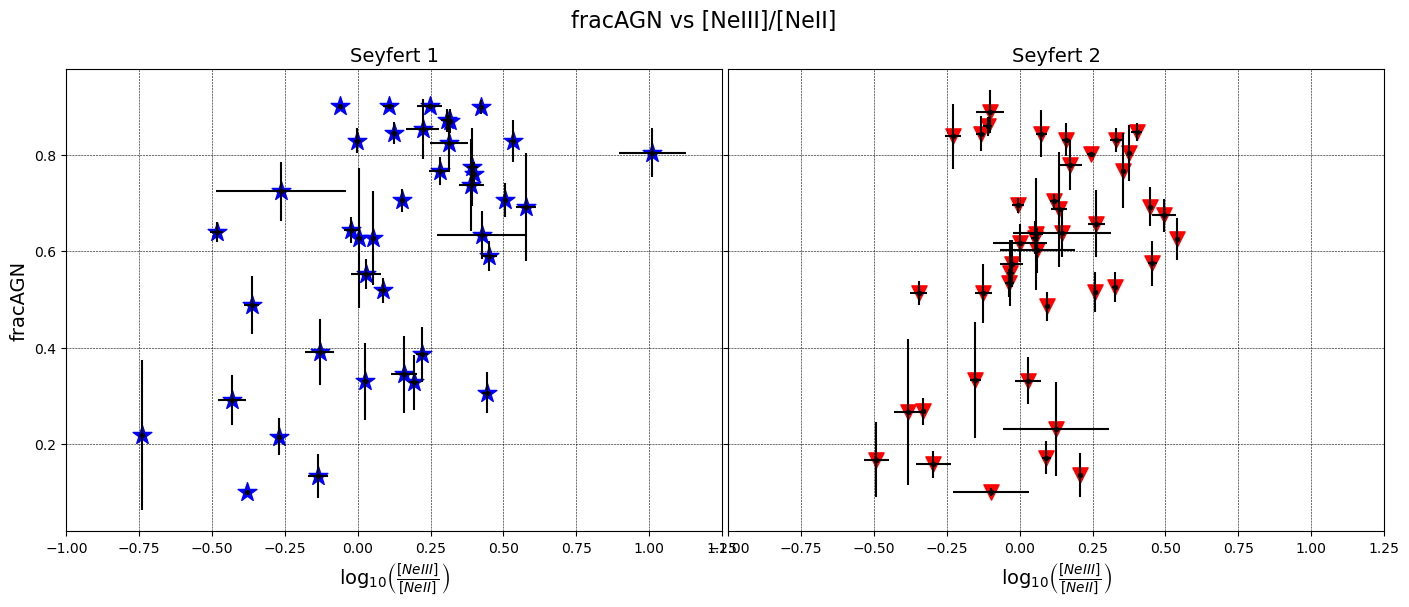

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(17,6),sharey=True)
fig.suptitle(r'fracAGN vs [NeIII]/[NeII]', fontsize=16)
ax1.scatter(NeIIINeII_Sy1['log_[NeIII]/[NeII]'],NeIIINeII_Sy1['bayes.agn.fracAGN'],200,color='blue',marker = '*')
ax1.errorbar(NeIIINeII_Sy1['log_[NeIII]/[NeII]'], NeIIINeII_Sy1['bayes.agn.fracAGN'],\
             NeIIINeII_Sy1['bayes.agn.fracAGN_err'], NeIIINeII_Sy1['log_[NeIII]/[NeII]_err'], fmt='k.')
ax1.set_xlim(-1,1.25)#ax1.set_xlim(20e-3,10e0) 
ax1.set_xlabel(r'$\log_{10}\left(\frac{[NeIII]}{[NeII]}\right)$', fontsize=14)
ax1.set_ylabel(r'fracAGN', fontsize=14)
ax1.set_title('Seyfert 1', fontsize=14)
ax2.scatter(NeIIINeII_Sy2['log_[NeIII]/[NeII]'], NeIIINeII_Sy2['bayes.agn.fracAGN'],120, color='red', marker = 'v')
ax2.errorbar(NeIIINeII_Sy2['log_[NeIII]/[NeII]'], NeIIINeII_Sy2['bayes.agn.fracAGN'],\
             NeIIINeII_Sy2['bayes.agn.fracAGN_err'], NeIIINeII_Sy2['log_[NeIII]/[NeII]_err'], fmt='k.')
ax2.set_xlim(-1,1.25)#ax2.set_xlim(20e-3,10e0)
ax2.set_xlabel(r'$\log_{10}\left(\frac{[NeIII]}{[NeII]}\right)$', fontsize=14)
ax2.set_title('Seyfert 2', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0.01) #Space between subplots
plt.savefig(path_graphs+'NeIII_NeII_vs_fracAGN_Sy1_vs_Sy2.jpg')

## Correlation coefficient between [NeIII]/[NeII] and AGN Fraction

In [43]:
NeIIINeII_corr_fracAGN_Sy = df_NeIIINeII_Sy['log_[NeIII]/[NeII]'].corr(df_NeIIINeII_Sy['bayes.agn.fracAGN'])
NeIIINeII_corr_fracAGN_Sy1 = df_NeIIINeII_Sy1['log_[NeIII]/[NeII]'].corr(df_NeIIINeII_Sy1['bayes.agn.fracAGN'])
NeIIINeII_corr_fracAGN_Sy2 = df_NeIIINeII_Sy2['log_[NeIII]/[NeII]'].corr(df_NeIIINeII_Sy2['bayes.agn.fracAGN'])

print('Pearson\'s correlation coefficient between [NeIII]/[NeII] ratio and AGN fraction:')
print('Total Sample: ',NeIIINeII_corr_fracAGN_Sy)
print('Seyfert 1: ',NeIIINeII_corr_fracAGN_Sy1)
print('Seyfert 2: ',NeIIINeII_corr_fracAGN_Sy2)

Pearson's correlation coefficient between [NeIII]/[NeII] ratio and AGN fraction:
Total Sample:  0.47104560463652856
Seyfert 1:  0.5221240090117947
Seyfert 2:  0.40435529414965193


## [NeIII]/[NeII] vs other variables (outputs from CIGALE)

In [44]:
NeIIINeII_corr_SFR_Sy = df_NeIIINeII_Sy['log_[NeIII]/[NeII]'].corr(df_NeIIINeII_Sy['log_bayes.sfh.sfr'])
NeIIINeII_corr_SFR_Sy1 = df_NeIIINeII_Sy1['log_[NeIII]/[NeII]'].corr(df_NeIIINeII_Sy1['log_bayes.sfh.sfr'])
NeIIINeII_corr_SFR_Sy2 = df_NeIIINeII_Sy2['log_[NeIII]/[NeII]'].corr(df_NeIIINeII_Sy2['log_bayes.sfh.sfr'])

NeIIINeII_corr_m_star_Sy = df_NeIIINeII_Sy['log_[NeIII]/[NeII]'].corr(df_NeIIINeII_Sy['log_bayes.stellar.m_star'])
NeIIINeII_corr_m_star_Sy1 = df_NeIIINeII_Sy1['log_[NeIII]/[NeII]'].corr(df_NeIIINeII_Sy1['log_bayes.stellar.m_star'])
NeIIINeII_corr_m_star_Sy2 = df_NeIIINeII_Sy2['log_[NeIII]/[NeII]'].corr(df_NeIIINeII_Sy2['log_bayes.stellar.m_star'])

print('\nPearson\'s correlation coefficient between [NeIII]/[NeII] ratio and Star Forming Rate:')
print('Total Sample: ',NeIIINeII_corr_SFR_Sy)
print('Seyfert 1: ',NeIIINeII_corr_SFR_Sy1)
print('Seyfert 2: ',NeIIINeII_corr_SFR_Sy2)

print('\nPearson\'s correlation coefficient between [NeIII]/[NeII] ratio and Star Mass:')
print('Total Sample: ',NeIIINeII_corr_m_star_Sy)
print('Seyfert 1: ',NeIIINeII_corr_m_star_Sy1)
print('Seyfert 2: ',NeIIINeII_corr_m_star_Sy2)


Pearson's correlation coefficient between [NeIII]/[NeII] ratio and Star Forming Rate:
Total Sample:  -0.08315321048588233
Seyfert 1:  0.008154627162793414
Seyfert 2:  -0.25891809017066697

Pearson's correlation coefficient between [NeIII]/[NeII] ratio and Star Mass:
Total Sample:  0.08700739945450907
Seyfert 1:  0.2905797350759824
Seyfert 2:  -0.26544656297084085


--------------------------

## Classifying galaxies according to their angle (i value from CIGALE)

### [NeV]/[NeII]

In [45]:
AGN_T1 = NeVNeII_Sy[NeVNeII_Sy['bayes.agn.i']<45]
AGN_T2 = NeVNeII_Sy[NeVNeII_Sy['bayes.agn.i']>45]

df_AGN_T1 = AGN_T1.to_pandas()
df_AGN_T2 = AGN_T2.to_pandas()

In [46]:
print('For the',len(AGN_T1),'galaxies with i<45°,',len(AGN_T1[AGN_T1['otype']=='Sy1']),'are Seyfert 1 and',\
     len(AGN_T1[AGN_T1['otype']=='Sy2']),'are Seyfert 2\n')

print('For the',len(AGN_T2),'galaxies with i>45°,',len(AGN_T2[AGN_T2['otype']=='Sy2']),'are Seyfert 2 and',\
     len(AGN_T2[AGN_T2['otype']=='Sy1']),'are Seyfert 1')

For the 41 galaxies with i<45°, 32 are Seyfert 1 and 9 are Seyfert 2

For the 41 galaxies with i>45°, 31 are Seyfert 2 and 10 are Seyfert 1


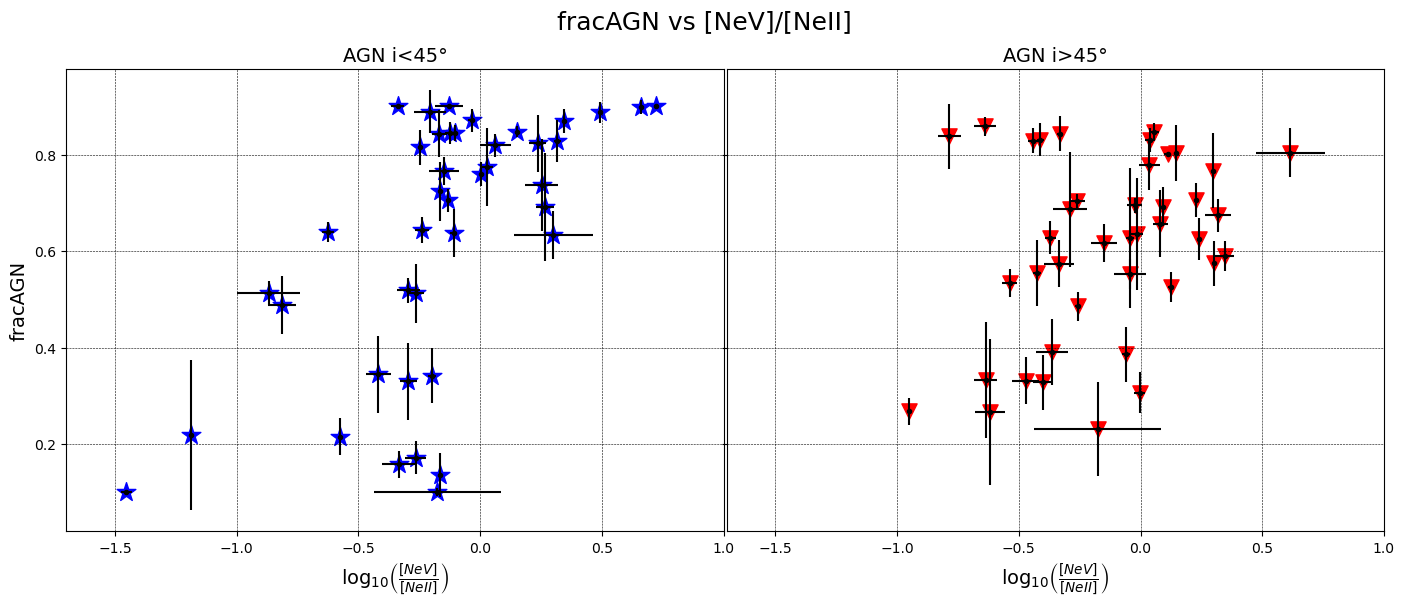

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(17,6),sharey=True)
fig.suptitle(r'fracAGN vs [NeV]/[NeII]', fontsize=18)
ax1.scatter(AGN_T1['log_[NeV]/[NeII]'],AGN_T1['bayes.agn.fracAGN'],200,color='blue',marker = '*')
ax1.errorbar(AGN_T1['log_[NeV]/[NeII]'], AGN_T1['bayes.agn.fracAGN'],\
             AGN_T1['bayes.agn.fracAGN_err'], AGN_T1['log_[NeV]/[NeII]_err'], fmt='k.')
ax1.set_xlim(-1.7,1)
ax1.set_xlabel(r'$\log_{10}\left(\frac{[NeV]}{[NeII]}\right)$', fontsize=14)
ax1.set_ylabel(r'fracAGN', fontsize=14)
ax1.set_title('AGN i<45°', fontsize=14)
ax2.scatter(AGN_T2['log_[NeV]/[NeII]'], AGN_T2['bayes.agn.fracAGN'],120, color='red', marker = 'v')
ax2.errorbar(AGN_T2['log_[NeV]/[NeII]'], AGN_T2['bayes.agn.fracAGN'],\
             AGN_T2['bayes.agn.fracAGN_err'], AGN_T2['log_[NeV]/[NeII]_err'], fmt='k.')
ax2.set_xlim(-1.7,1)
ax2.set_xlabel(r'$\log_{10}\left(\frac{[NeV]}{[NeII]}\right)$', fontsize=14)
ax2.set_title('AGN i>45°', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0.005) #Space between subplots

In [48]:
NeVNeII_corr_AGNT1 = df_AGN_T1['log_[NeV]/[NeII]'].corr(df_AGN_T1['bayes.agn.fracAGN'])
NeVNeII_corr_AGNT2 = df_AGN_T2['log_[NeV]/[NeII]'].corr(df_AGN_T2['bayes.agn.fracAGN'])

print('Pearson\'s correlation coefficient between [NeV]/[NeII] ratio and AGN fraction:')
print('AGN i<45°: ',NeVNeII_corr_AGNT1)
print('AGN i>45°: ',NeVNeII_corr_AGNT2)

Pearson's correlation coefficient between [NeV]/[NeII] ratio and AGN fraction:
AGN i<45°:  0.619914940393564
AGN i>45°:  0.3230889388395862


In [49]:
NeVNeII_fracAGN_AGNT1 = BootstrapCorr(10000,1,df_AGN_T1,'log_[NeV]/[NeII]','bayes.agn.fracAGN')

Bootstraps results for the correlation coefficient:
Samples lenght: 41 of 41
Number of samples: 10000
Median: 0.619211371222369
Mean: 0.6149123050102995
Variance: 0.0068223890110432305
Standard Desviation: 0.08259775427360741
90% confidence interval: 0.47396445754407956 - 0.7442575640037005


In [50]:
NeVNeII_fracAGN_AGNT2 = BootstrapCorr(10000,1,df_AGN_T2,'log_[NeV]/[NeII]','bayes.agn.fracAGN')

Bootstraps results for the correlation coefficient:
Samples lenght: 41 of 41
Number of samples: 10000
Median: 0.327237841663373
Mean: 0.32039152533179066
Variance: 0.0256365554542533
Standard Desviation: 0.16011419504295457
90% confidence interval: 0.041904395334819176 - 0.5684245553903693


---------------------------
## Alternative graphic for [NeV/NeII] vs AGN Frac:

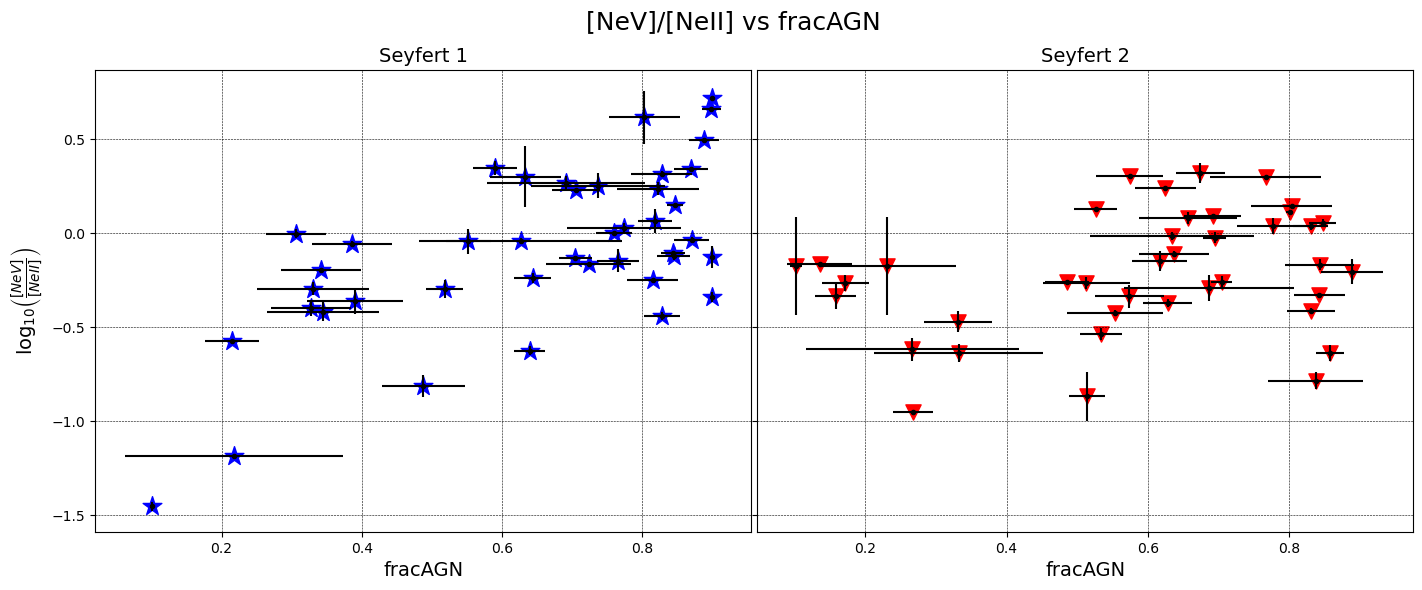

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(17,6),sharey=True)
fig.suptitle(r'[NeV]/[NeII] vs fracAGN', fontsize=18)
ax1.scatter(NeVNeII_Sy1['bayes.agn.fracAGN'],NeVNeII_Sy1['log_[NeV]/[NeII]'],200,color='blue',marker = '*')
ax1.errorbar(NeVNeII_Sy1['bayes.agn.fracAGN'], NeVNeII_Sy1['log_[NeV]/[NeII]'],\
             NeVNeII_Sy1['log_[NeV]/[NeII]_err'], NeVNeII_Sy1['bayes.agn.fracAGN_err'], fmt='k.')
ax1.set_xlabel(r'fracAGN', fontsize=14)
ax1.set_ylabel(r'$\log_{10}\left(\frac{[NeV]}{[NeII]}\right)$', fontsize=14)
ax1.set_title('Seyfert 1', fontsize=14)
ax2.scatter(NeVNeII_Sy2['bayes.agn.fracAGN'], NeVNeII_Sy2['log_[NeV]/[NeII]'], 120, color='red', marker = 'v')
ax2.errorbar(NeVNeII_Sy2['bayes.agn.fracAGN'], NeVNeII_Sy2['log_[NeV]/[NeII]'], \
             NeVNeII_Sy2['log_[NeV]/[NeII]_err'], NeVNeII_Sy2['bayes.agn.fracAGN_err'], fmt='k.')
ax2.set_xlabel(r'fracAGN', fontsize=14)
ax2.set_title('Seyfert 2', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0.01) #Space between subplots

---------------------------------------

## Final numbers

In [52]:
date_sample = 'Sep_02_2022'
simbad_sample_Sy = Table.read(path_raw+'SMB_'+date_sample+'_Sy_Samples'+'.vot',format='votable') 
NeIR_Sy = Table.read(path_raw+'Obj_Sy_Ne-IR_'+date_sample+'.vot',format='votable')
CIG_BadGalaxies = Table.read('../Datos/Complementary/CIGPhot_BadEnergyBalance.tbl', format='ascii')
CIG = Table.read(path_FINAL+'CIGPhot_EnergyBal_All.tbl', format='ascii')
out0to90 = Table.read(path_CIGALE_out+'results0a90_All.txt', format='ascii')

In [53]:
print('From the',len(simbad_sample_Sy),'Seyfert Galaxies from the SIMBAD sample,',len(NeIR_Sy),'have information\n\
of Neon lines ([NeII],[NeIII] or [NeV]).\n') 

print('After remove',len(CIG_BadGalaxies),'galaxies with bad energy balance coverage, the total of galaxies \n\
to model and fit their SEDs in CIGALE was',len(CIG),'.\n')

print(r'Cleaining the',len(CIG),'galaxies from CIGALE results of the galaxies with bad fittings \n\
and a bad constrained SFR (\'pcigale.ini\' setup i = 0 to 90),',len(CIG)-len(out0to90),'galaxies \n\
was removed leaving a total of',len(out0to90),'galaxies\n')

print('Of this',len(out0to90),'galaxies, only',len(Ne_Sy),'have information from at least two different \n\
Neon spectral lines with the same bibcodes to calcule the spectral line ratios\n')

print('From the', len(Ne_Sy),'galaxies:',len(NeVNeII_Sy),'galaxies have [NeV]/[NeII] info,')
print(len(NeVNeIII_Sy),'galaxies have [NeV]/[NeIII] info and',len(NeIIINeII_Sy),'galaxies have [NeIII]/[NeII] info')

From the 44270 Seyfert Galaxies from the SIMBAD sample, 303 have information
of Neon lines ([NeII],[NeIII] or [NeV]).

After remove 51 galaxies with bad energy balance coverage, the total of galaxies 
to model and fit their SEDs in CIGALE was 252 .

Cleaining the 252 galaxies from CIGALE results of the galaxies with bad fittings 
and a bad constrained SFR ('pcigale.ini' setup i = 0 to 90), 134 galaxies 
was removed leaving a total of 118 galaxies

Of this 118 galaxies, only 95 have information from at least two different 
Neon spectral lines with the same bibcodes to calcule the spectral line ratios

From the 95 galaxies: 82 galaxies have [NeV]/[NeII] info,
80 galaxies have [NeV]/[NeIII] info and 83 galaxies have [NeIII]/[NeII] info


### Other info for the galaxies with [NeV] and [NeII] lines info

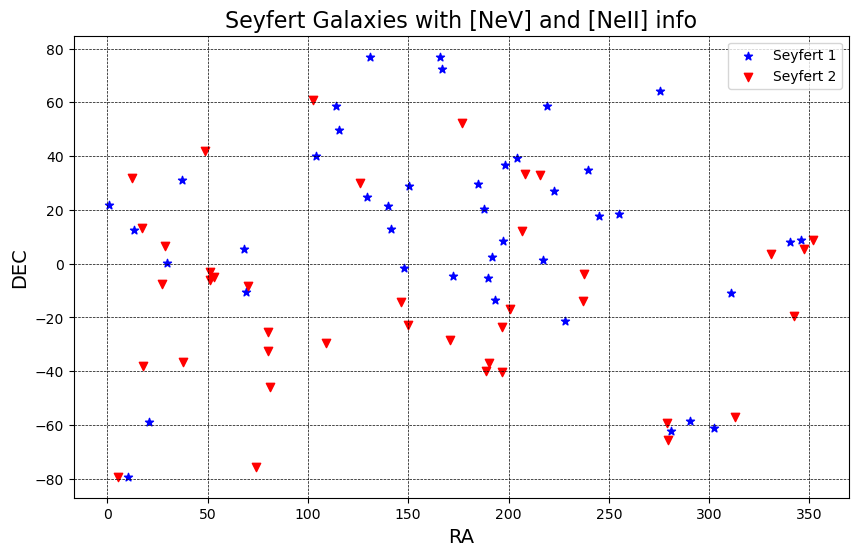

In [54]:
plt.figure(figsize=(10,6))
plt.scatter(NeVNeII_Sy1['RA'], NeVNeII_Sy1['DEC'], color='blue', marker = '*', label='Seyfert 1')
plt.scatter(NeVNeII_Sy2['RA'], NeVNeII_Sy2['DEC'], color='red', marker = 'v', label='Seyfert 2')
#plt.scatter(NeVNeII_SyG['RA'], NeVNeII_SyG['DEC'], color='black', marker = '.', label='Seyfert Galaxies')
plt.xlabel(r'RA', fontsize=14)
plt.ylabel(r'DEC', fontsize=14)
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.title(r'Seyfert Galaxies with [NeV] and [NeII] info', fontsize=16)
plt.legend()
plt.show()

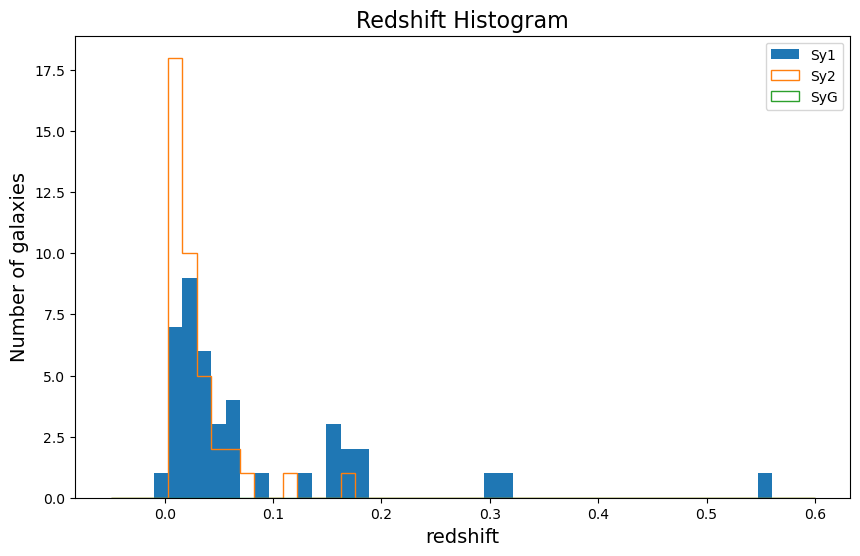

In [55]:
x_Sy1 = NeVNeII_Sy1['redshift']
x_Sy2 = NeVNeII_Sy2['redshift']
x_SyG = NeVNeII_SyG['redshift']
bins_Sy = np.linspace(-0.05,0.6,50)
plt.figure(figsize=(10,6))
plt.hist(x_Sy1, bins=bins_Sy, label='Sy1')
plt.hist(x_Sy2, bins=bins_Sy, histtype='step', label='Sy2')
plt.hist(x_SyG, bins=bins_Sy, histtype='step', label='SyG')
plt.xlabel('redshift',fontsize=14)
plt.ylabel('Number of galaxies',fontsize=14)
#plt.yscale('log')
plt.title('Redshift Histogram', fontsize=16)
plt.legend()

In [56]:
print('Min redshift value for Sy1:',min(x_Sy1),'. Max redshift value for Sy1:',max(x_Sy1))
print('Min redshift value for Sy2:',min(x_Sy2),'. Max redshift value for Sy2:',max(x_Sy2))

Min redshift value for Sy1: 0.002838630450136274 . Max redshift value for Sy1: 0.55517
Min redshift value for Sy2: 0.005554 . Max redshift value for Sy2: 0.173


-------------------------------------
## Notebook Info

In [57]:
%reload_ext watermark
%watermark -a "Jonhatan Bernal" -d -v -m
print('Specific Python packages')
%watermark -iv -w --packages astropy

Author: Jonhatan Bernal

Python implementation: CPython
Python version       : 3.9.12
IPython version      : 7.31.1

Compiler    : GCC 7.5.0
OS          : Linux
Release     : 5.15.0-56-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

Specific Python packages
astropy: 5.1

numpy     : 1.21.5
pandas    : 1.4.4
matplotlib: 3.5.2
astropy   : 5.1

Watermark: 2.3.1



-----------------------------------------
### Cells for test

0.6571882151087911
0.6446607551367428
0.09880775580739865
0.46300272543065557 - 0.7859926056726197


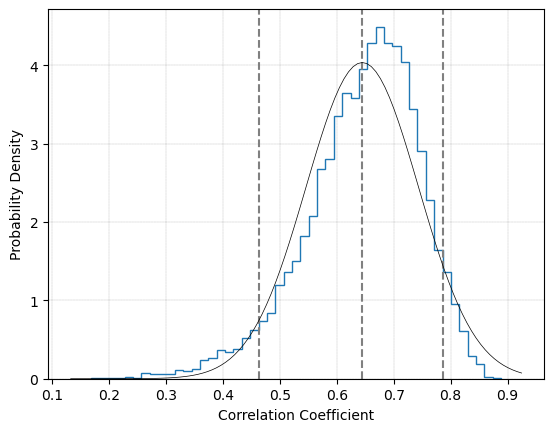

In [58]:
corrdata = []
for i in range(10000):
    sample = df_NeVNeII_Sy1.sample(frac=1,replace=True)
    corr = sample['log_[NeV]/[NeII]'].corr(sample['bayes.agn.fracAGN'])
    corrdata.append(corr)

mu, std = norm.fit(corrdata)

bins = np.linspace(min(corrdata), max(corrdata),50)
plt.hist(corrdata, bins=bins, density=True, histtype='step')
plt.axvline(x=np.mean(corrdata),ls='--',color='gray')
plt.axvline(x=np.percentile(corrdata,5),ls='--',color='gray')
plt.axvline(x=np.percentile(corrdata,95),ls='--',color='gray')
plt.xlabel(r'Correlation Coefficient')
plt.ylabel('Probability Density')
plt.grid(color='k', linestyle='--', linewidth=0.1)

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=0.5)

print(np.median(corrdata))
print(mu)
print(std)
print(np.percentile(corrdata,5),'-',np.percentile(corrdata,95))